<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/3_Ising_Model/mean_field_2DIsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean-Field Approximation for 2D Ising Model

The 2D Ising model is a fundamental model in statistical mechanics used to describe ferromagnetism in magnetic systems. In the mean-field approximation, the interactions between a particular spin and all the other spins are replaced by an average interaction with a mean magnetic field.

For a 2D square lattice, we can write the Hamiltonian as:
$$ H = -J \sum_{\langle i,j \rangle} s_i s_j $$

Where:
- $ J $ is the exchange constant.
- $ s_i $ and $ s_j $ are spins taking values in $\{-1,1\}$.
- The sum runs over all nearest-neighbor pairs $\langle i,j \rangle$. Double counting should be avoided.

The mean-field approximation simplifies the treatment of the model, allowing for an analytical solution. The idea is to replace the effect of all other spins on a given spin with an effective mean field. This results in a self-consistent equation for the average magnetization $ m $.

## Effective Hamiltonian in the Mean-Field Approximation

For the mean-field approximation, the effective Hamiltonian for a single spin $ s_i $, in the presence of the mean field created by the other spins, can be written as:

$$ H_{\text{eff}} = -Jz s_i m $$

Where:
- $ z $ is the coordination number, representing the number of nearest neighbors. For a 2D square lattice, $ z = 4 $.

This effective Hamiltonian provides a simplified way to understand the energy of a single spin $ s_i $ in the mean field. The negative sign indicates that a spin aligned with the field (either both up or both down) will have a lower energy than one anti-aligned.

Next, we want to express the average magnetization $ m $ in terms of the Boltzmann probability distribution.



## Effective Hamiltonian and Boltzmann Distribution

Using the effective Hamiltonian, the Boltzmann probability distribution gives us the likelihood of the spin being in a certain state at temperature $ T $.

For the spin being up (+1):

$$ P_+ = \frac{e^{-\beta H_{\text{eff}}(s_i=1)}}{e^{-\beta H_{\text{eff}}(s_i=1)} + e^{-\beta H_{\text{eff}}(s_i=-1)}} = \frac{\text{EDIT HERE}}{e^{\beta Jzm} + e^{-\beta Jzm}} $$

For the spin being down (-1):

$$ P_- = \frac{e^{-\beta H_{\text{eff}}(s_i=-1)}}{e^{-\beta H_{\text{eff}}(s_i=1)} + e^{-\beta H_{\text{eff}}(s_i=-1)}} = (\text{EDIT HERE}) $$

Where:
- $ \beta = \frac{1}{k_B T} $, with $ k_B $ being the Boltzmann constant.

From the above probabilities, the average value $m$ of the spin, which represents the average magnetization per spin, is:

$$ m = P_+ - P_- = \tanh(\beta Jzm) $$

This equation, derived from the effective Hamiltonian and the Boltzmann distribution, is the self-consistent mean-field equation for the Ising model. It provides a relationship between the average magnetization $ m $, temperature $ T $, and the interaction strength $ J $.


## Analytical Solution Using Taylor Expansion

The Taylor expansion of the hyperbolic tangent around $ m = 0 $ is:
$ \tanh(x) \approx x - \frac{x^3}{3} $

Plugging this into our self-consistent equation:
$ m \approx \beta Jzm - \frac{1}{3} (\beta Jzm)^3 $

... (EDIT HERE and Provide the analytical solution)

## Numerical Solution

To find $ m $ as a function of $ T $, we can iteratively solve the hyperbolic tangent equation for $ m $ until convergence for a given $ T $.


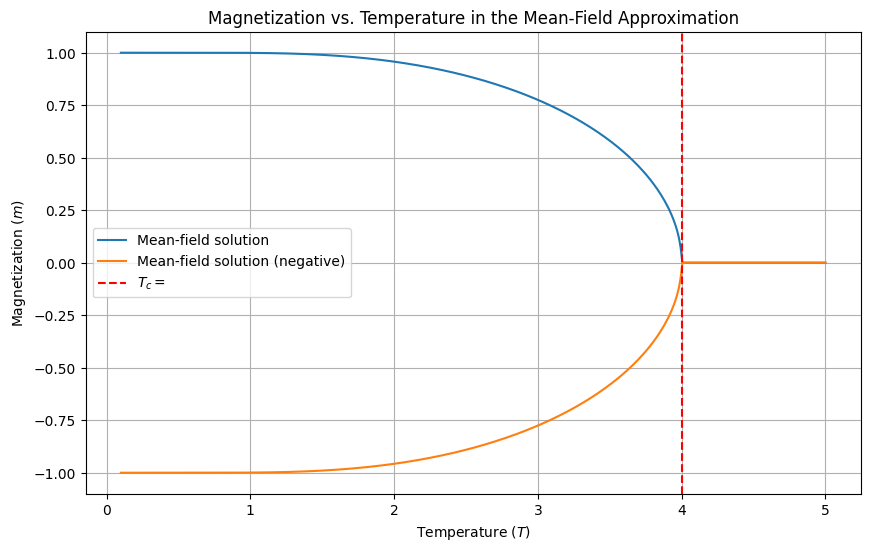

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
J = 1  # exchange constant
z = 4  # coordination number for 2D square lattice

# here, k_B = 1.

# Iteratively solve for m for a given temperature T
def solve_m(T, tol=1e-6, max_iter=10000):
    beta = 1 / T
    m_old = 0.01  # initial guess
    for _ in range(max_iter):
        m_new = np.tanh(beta * J * z * m_old)
        if abs(m_new - m_old) < tol:
            return m_new
        m_old = m_new
    return m_old

# Compute m for a range of temperatures
temperatures = np.linspace(0.1, 5, 400)
m_values = [solve_m(T) for T in temperatures]
m_neg = [-x for x in m_values]

# Plotting m as a function of T
plt.figure(figsize=(10,6))
plt.plot(temperatures, m_values, label='Mean-field solution')
plt.plot(temperatures, m_neg, label='Mean-field solution (negative)')
plt.axvline(x=J*z, color='r', linestyle='--', label='$T_c=\frac{Jz}{k_B}$')
plt.xlabel('Temperature ($T$)')
plt.ylabel('Magnetization ($m$)')
plt.title('Magnetization vs. Temperature in the Mean-Field Approximation')
plt.legend()
plt.grid(True)
plt.show()


## Interpretation

The bifurcation in the plot is evident near the critical temperature $ T_c $. Above $ T_c $, the system is in a disordered phase with zero magnetization, while below $ T_c $, there are two possible ordered phases with positive and negative magnetization.


## Stability Analysis of the Mean-Field Solutions

Given the mean-field equation for the magnetization $m$:

$$ m = \tanh(\beta J z m) $$

To probe the stability of our self-consistent solution, we introduce a time dependence, casting our equation into a rate equation form. This is a prevalent strategy when examining the dynamical behavior of systems, particularly in the context of order parameters. In this scenario, the rate equation below can be conceived as a reflection of time-dependent fluctuations in $m$:

$$ \frac{dm(t)}{dt} = - m + \tanh(\beta J z m) $$

For this dynamical system, the steady-state solutions, denoted as $m^*$, naturally satisfy:

$$ m^* = \tanh(\beta J z m^*) $$

To delve into the stability of these equilibrium solutions $m^*$, we consider minute perturbations $\delta m$ around them:

$$ m = m^* + \delta m $$

On substituting this expression into our time-dependent equation and then linearizing with respect to $\delta m$, we get:

$$ \frac{d\delta m}{dt} = - m^* - \delta m + \left( \tanh(\beta J z m^*) + (1 - \tanh^2(\beta J z m^*)) \beta J z \delta m \right) $$

Given that at equilibrium $m^* = \tanh(\beta J z m^*)$, the above equation simplifies to:

$$ \frac{d\delta m}{dt} = \left[ -1 + (1 - \tanh^2(\beta J z m^*)) \beta J z \right] \delta m $$

The coefficient of $\delta m$ in this equation plays a pivotal role in determining the stability:

$$ \lambda = -1 + (1 - \tanh^2(\beta J z m^*)) \beta J z $$

1. If $\lambda > 0$, perturbations amplify, suggesting the equilibrium is unstable.
2. If $\lambda < 0$, perturbations diminish, denoting a stable equilibrium.

The stability criterion is thus demarcated by the sign of $\lambda$. By evaluating the solutions for $m^*$ and observing the sign of $\lambda$, we can decipher which solutions remain stable under specific conditions.
